<a href="https://colab.research.google.com/github/nishitawaghela/DA_Startup/blob/main/startup_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/big_startup_secsees_dataset.csv")

In [ ]:
df.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [ ]:
df.shape

(66368, 14)

In [ ]:
df.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


In [ ]:
df.isnull().sum()

,0
permalink,0
name,1
homepage_url,5058
category_list,3148
funding_total_usd,0
status,0
country_code,6958
state_code,8547
region,8030
city,8028


In [ ]:
drop_cols = ['permalink', 'homepage_url']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [ ]:
df = df.dropna(subset=['status'])

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(0)

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [ ]:
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[col + "_year"] = df[col].dt.year

/tmp/ipython-input-1729152918.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [ ]:
df['is_failed'] = df['status'].apply(lambda x: 1 if x.lower() == 'closed' else 0)

In [ ]:
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year,first_funding_at_year,last_funding_at_year,is_failed
0,#fame,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaN,2015.0,2015,0
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0,2014,0
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,Unknown,Unknown,Unknown,Unknown,1,NaT,2014-01-30,2014-01-30,NaN,2014.0,2014,0
3,0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007.0,2008.0,2008,0
4,004 Technologies,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010.0,2014.0,2014,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   66368 non-null  object        
 1   category_list          66368 non-null  object        
 2   funding_total_usd      66368 non-null  object        
 3   status                 66368 non-null  object        
 4   country_code           66368 non-null  object        
 5   state_code             66368 non-null  object        
 6   region                 66368 non-null  object        
 7   city                   66368 non-null  object        
 8   funding_rounds         66368 non-null  int64         
 9   founded_at             51143 non-null  datetime64[ns]
 10  first_funding_at       66341 non-null  datetime64[ns]
 11  last_funding_at        66368 non-null  datetime64[ns]
 12  founded_at_year        51143 non-null  float64       
 13  f

In [ ]:
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce').fillna(0)

In [ ]:
df['primary_category'] = df['category_list'].apply(lambda x: str(x).split('|')[0] if x != 'Unknown' else 'Unknown')

In [ ]:
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year,first_funding_at_year,last_funding_at_year,is_failed,primary_category
0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaN,2015.0,2015,0,Media
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0,2014,0,Application Platforms
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,Unknown,Unknown,Unknown,Unknown,1,NaT,2014-01-30,2014-01-30,NaN,2014.0,2014,0,Apps
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007.0,2008.0,2008,0,Curated Web
4,004 Technologies,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010.0,2014.0,2014,0,Software


In [ ]:
bins = [0, 100000, 1000000, 10000000, 100000000, float('inf')]
labels = ['<100K', '100K-1M', '1M-10M', '10M-100M', '>100M']
df['funding_bin'] = pd.cut(df['funding_total_usd'], bins=bins, labels=labels, right=False)

In [ ]:
failure_by_funding = df.groupby('funding_bin')['is_failed'].mean().reset_index()

/tmp/ipython-input-661242560.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_by_funding = df.groupby('funding_bin')['is_failed'].mean().reset_index()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-2482381258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='funding_bin', y='is_failed', data=failure_by_funding, palette='viridis')


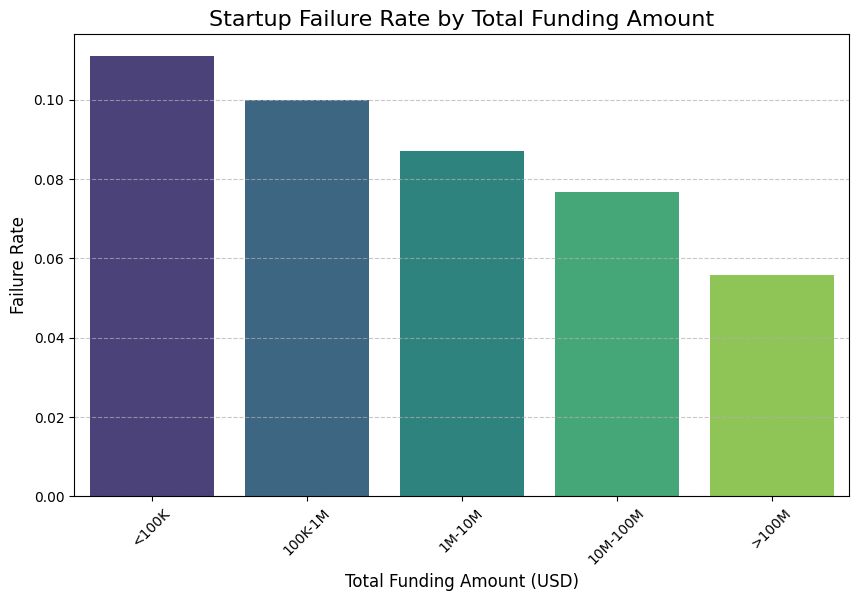

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='funding_bin', y='is_failed', data=failure_by_funding, palette='viridis')
plt.title('Startup Failure Rate by Total Funding Amount', fontsize=16)
plt.xlabel('Total Funding Amount (USD)', fontsize=12)
plt.ylabel('Failure Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
failure_by_sector = df.groupby('primary_category')['is_failed'].agg(['mean', 'count']).reset_index()
failure_by_sector.columns = ['primary_category', 'failure_rate', 'total_count']

In [ ]:
failure_by_sector = failure_by_sector[failure_by_sector['total_count'] > 50].sort_values(by='failure_rate', ascending=False).head(10)

/tmp/ipython-input-1020905336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='failure_rate', y='primary_category', data=failure_by_sector, palette='magma')


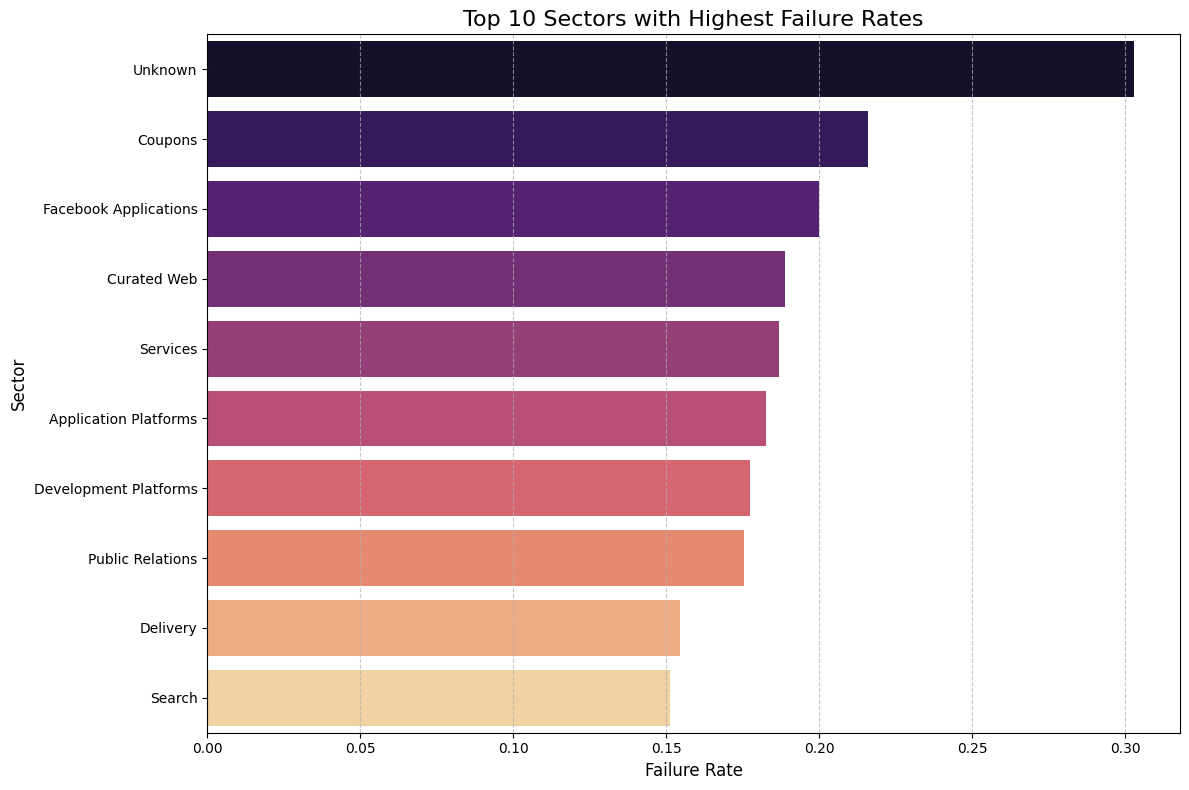

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='failure_rate', y='primary_category', data=failure_by_sector, palette='magma')
plt.title('Top 10 Sectors with Highest Failure Rates', fontsize=16)
plt.xlabel('Failure Rate', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
failure_by_country = df.groupby('country_code')['is_failed'].agg(['mean', 'count']).reset_index()
failure_by_country.columns = ['country_code', 'failure_rate', 'total_count']

In [ ]:
failure_by_country = failure_by_country[failure_by_country['total_count'] > 50].sort_values(by='failure_rate', ascending=False).head(10)

/tmp/ipython-input-2396613427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='failure_rate', y='country_code', data=failure_by_country, palette='plasma')


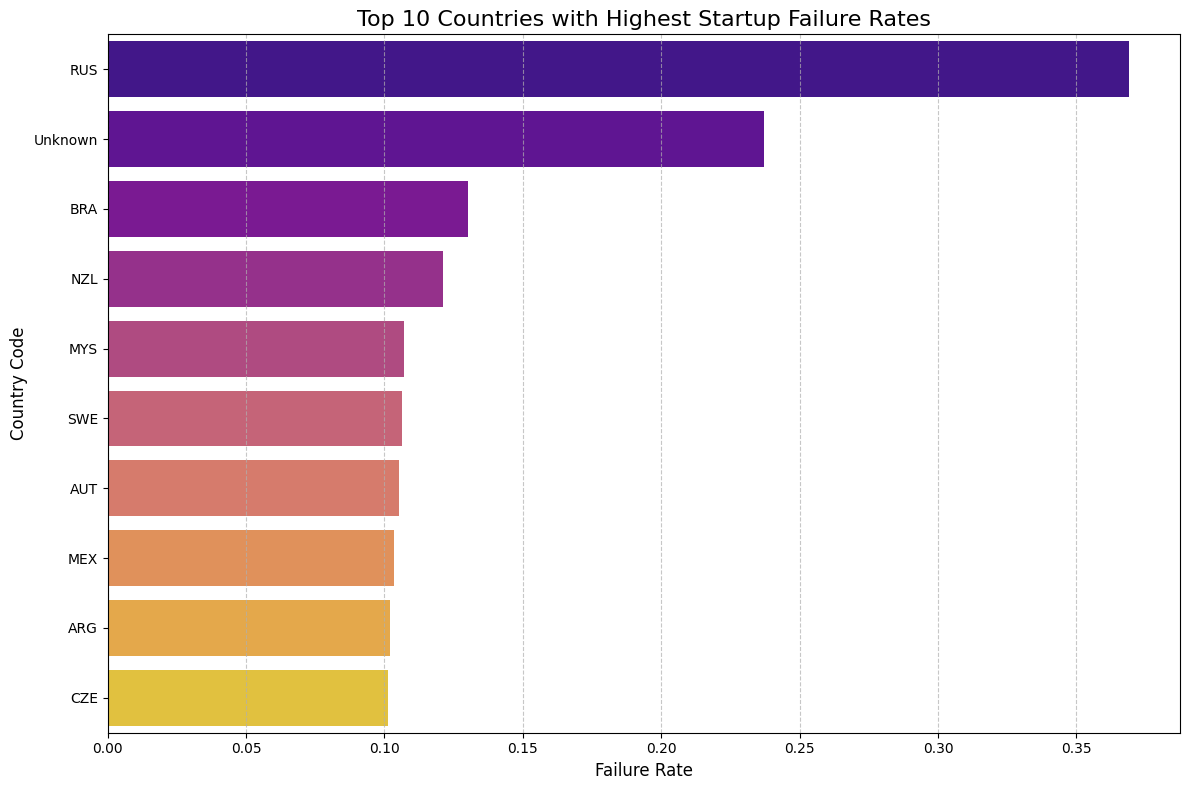

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='failure_rate', y='country_code', data=failure_by_country, palette='plasma')
plt.title('Top 10 Countries with Highest Startup Failure Rates', fontsize=16)
plt.xlabel('Failure Rate', fontsize=12)
plt.ylabel('Country Code', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
failure_by_rounds = df.groupby('funding_rounds')['is_failed'].mean().reset_index()

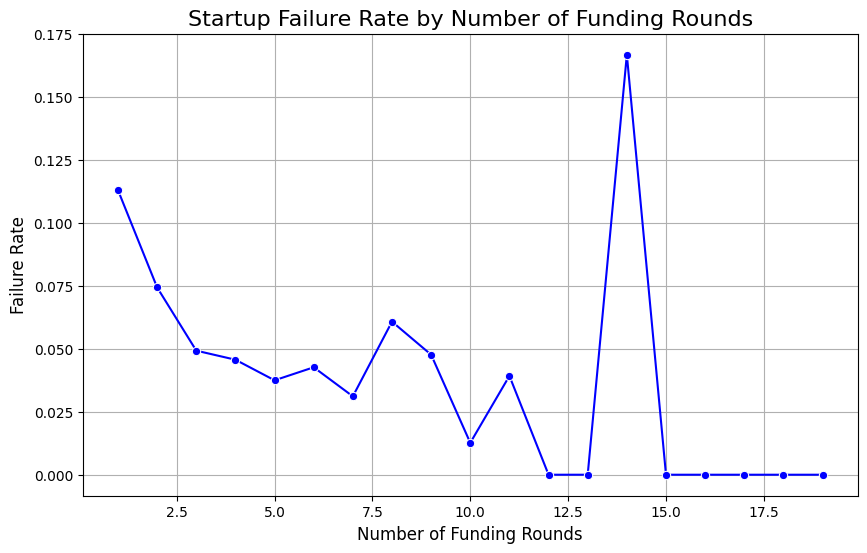

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='funding_rounds', y='is_failed', data=failure_by_rounds, marker='o', color='b')
plt.title('Startup Failure Rate by Number of Funding Rounds', fontsize=16)
plt.xlabel('Number of Funding Rounds', fontsize=12)
plt.ylabel('Failure Rate', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
failure_by_year = df.groupby('founded_at_year')['is_failed'].mean().reset_index()

In [ ]:
failure_by_year = failure_by_year[(failure_by_year['founded_at_year'] >= 1990) & (failure_by_year['founded_at_year'] <= 2015)]

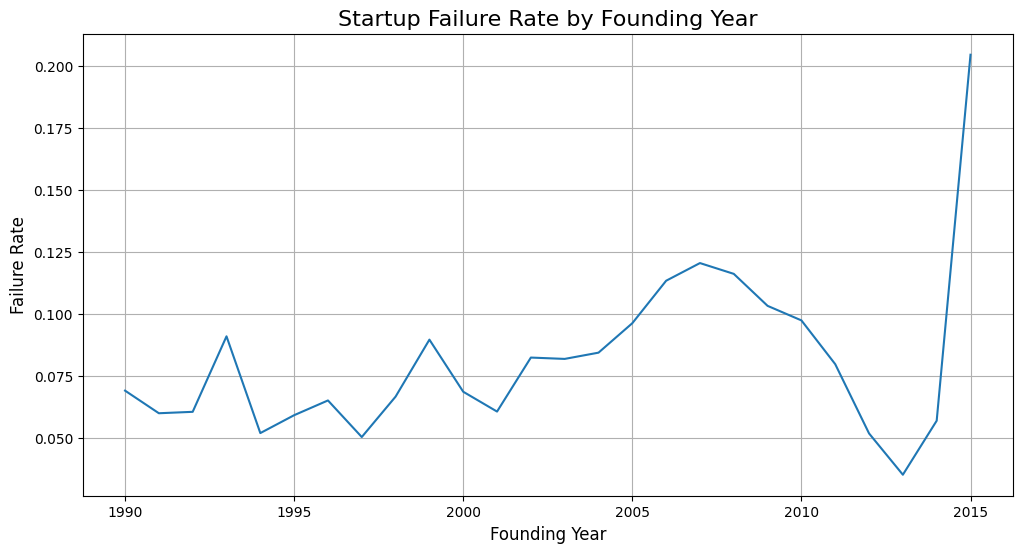

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='founded_at_year', y='is_failed', data=failure_by_year)
plt.title('Startup Failure Rate by Founding Year', fontsize=16)
plt.xlabel('Founding Year', fontsize=12)
plt.ylabel('Failure Rate', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
numerical_df = df[['funding_total_usd', 'funding_rounds', 'founded_at_year', 'first_funding_at_year', 'last_funding_at_year', 'is_failed']]

In [ ]:
correlation_matrix = numerical_df.corr()

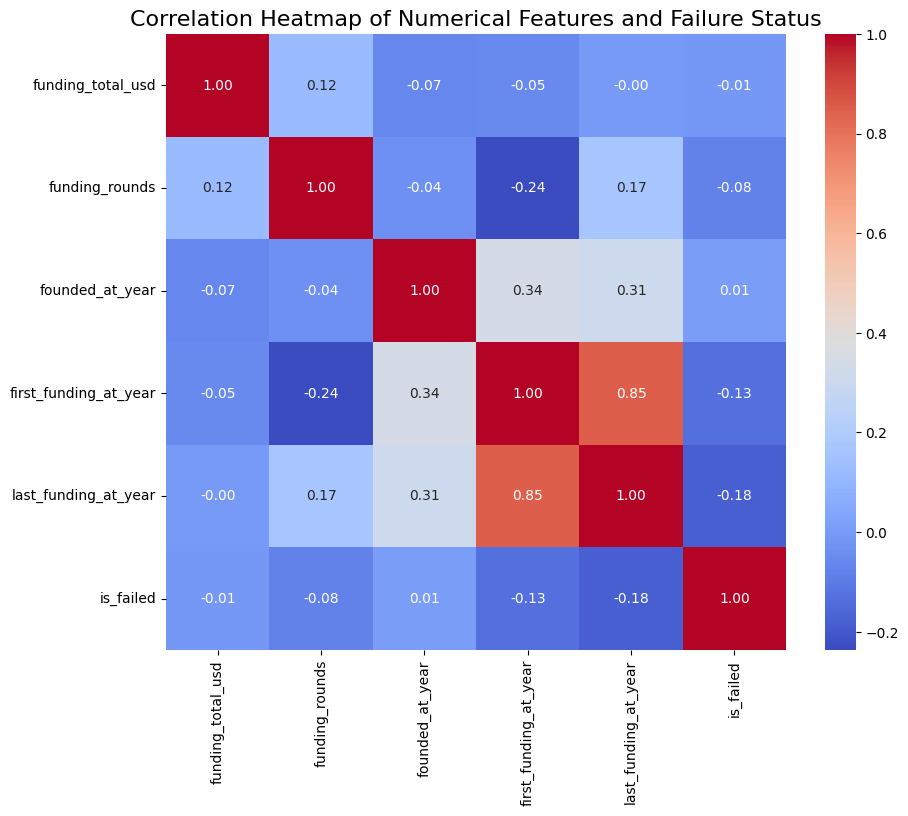

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Failure Status', fontsize=16)
plt.show()

In [ ]:
df.to_csv('startup_analysis_data.csv', index=False)